In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1182,2020-08-02,United Kingdom,304219.0,303952.0,46206.0,46193.0,267.0,13.0
1183,2020-08-02,Germany,210495.0,209893.0,9161.0,9141.0,602.0,20.0
1184,2020-08-02,Iran,307728.0,306752.0,16982.0,16982.0,976.0,0.0
1185,2020-08-02,Turkey,231781.0,231869.0,5705.0,5710.0,-88.0,-5.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  3673.704296545914
RMSE =  10930.9782661139


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  289.12721145745576
RMSE =  683.0427057120611


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  20493.245614035088
RMSE =  31911.73936250343
-- World performances for deaths --
MAE =  1555.421052631579
RMSE =  1892.9100172309654


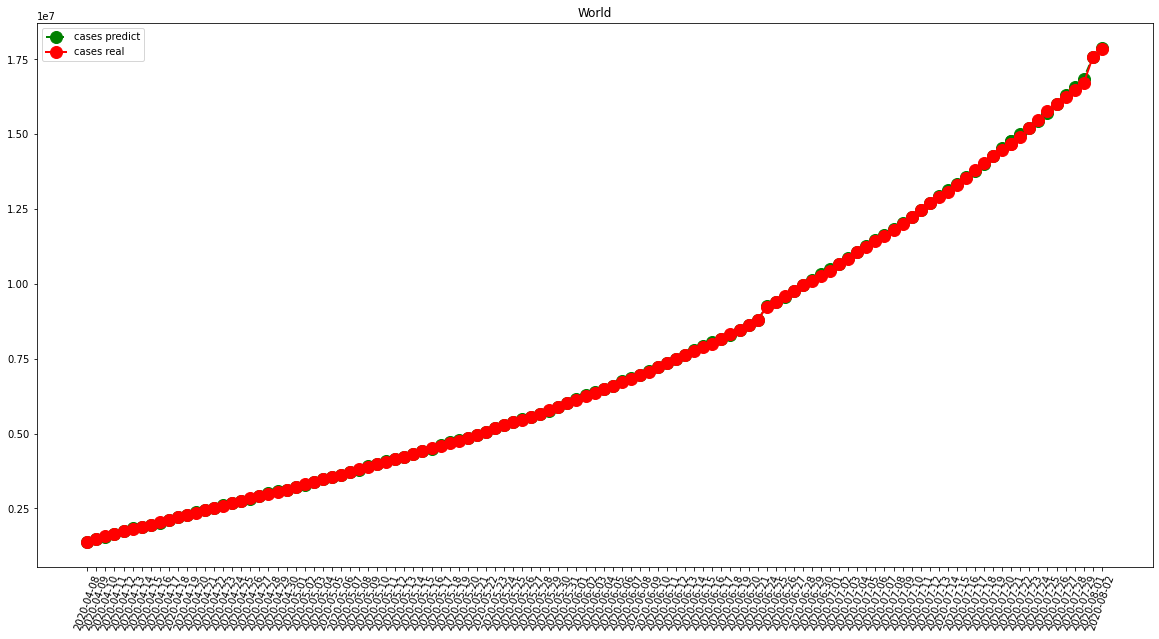

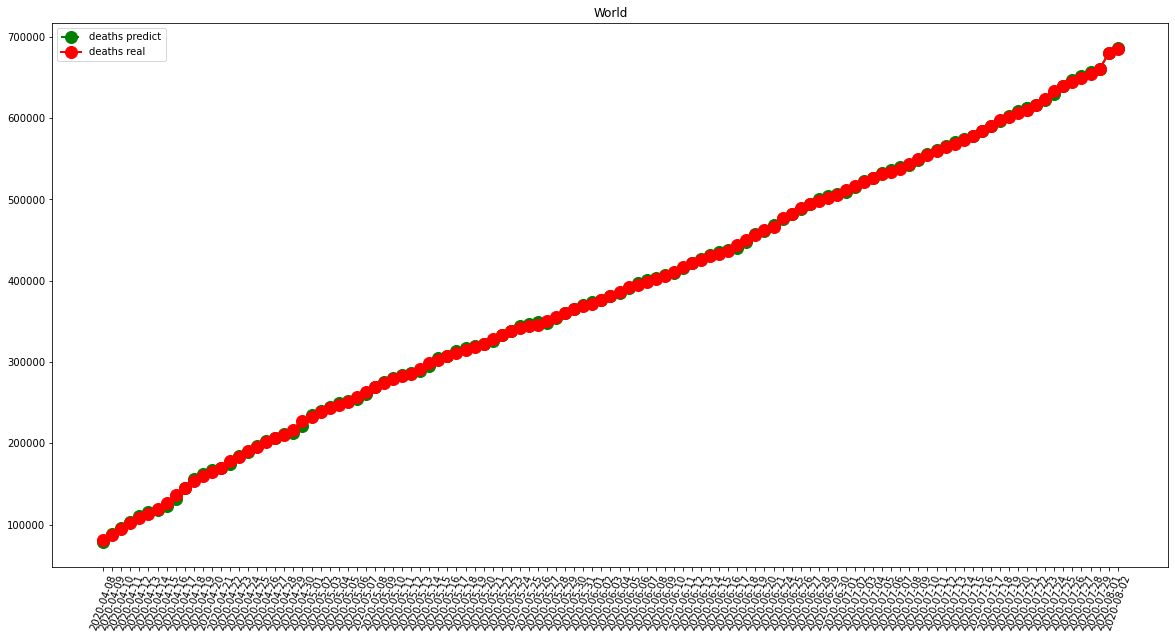

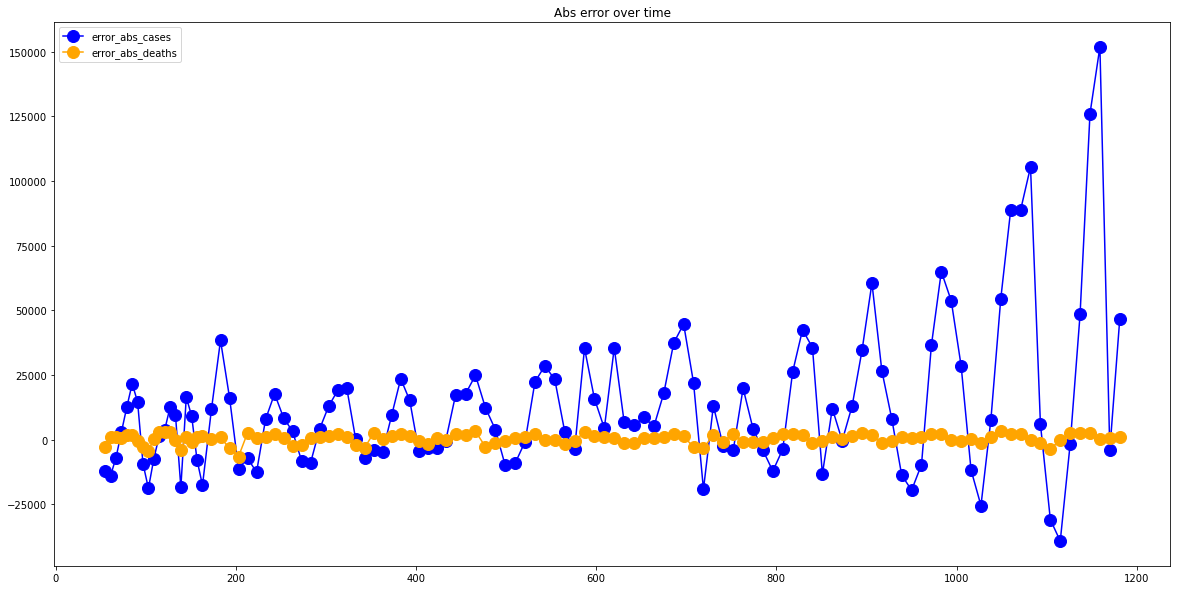

In [7]:
visShow("World")

-- France performances for cases --
MAE =  851.7822580645161
RMSE =  1366.8849120914408
-- France performances for deaths --
MAE =  145.8709677419355
RMSE =  300.9922836863259


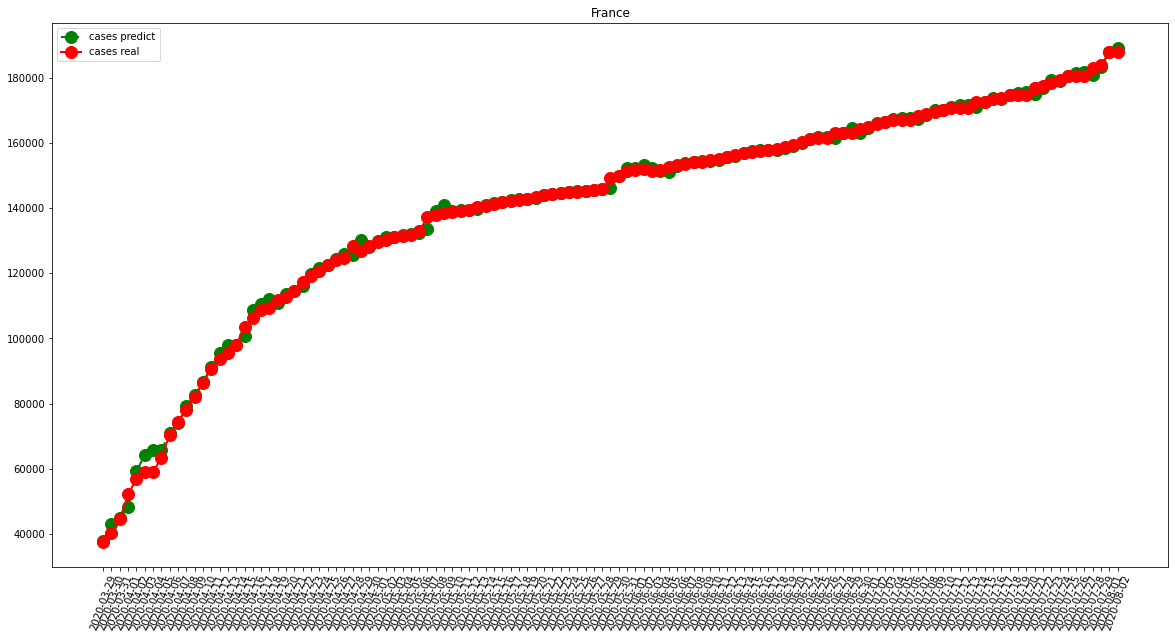

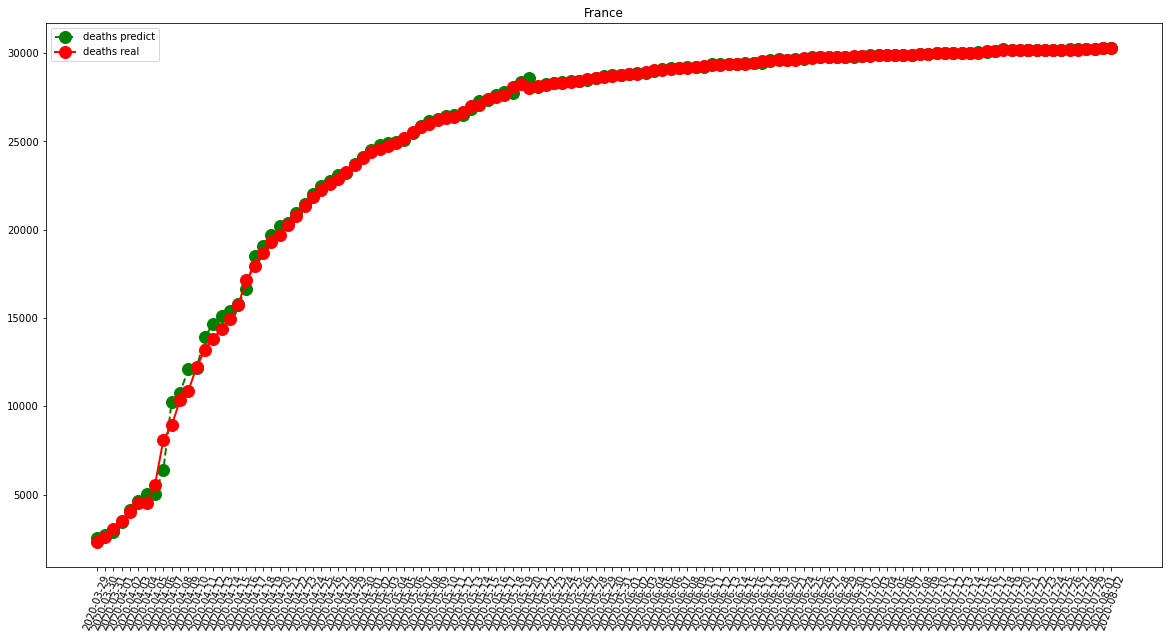

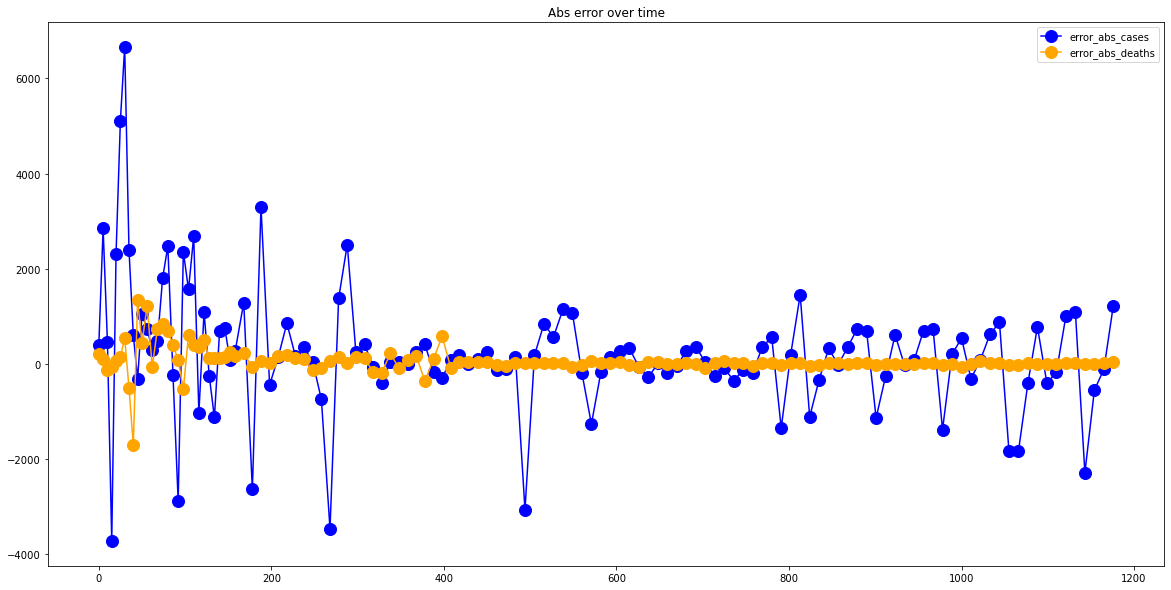

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  324.5725806451613
RMSE =  491.09787310447797
-- Italy performances for deaths --
MAE =  83.21774193548387
RMSE =  265.7936836308653


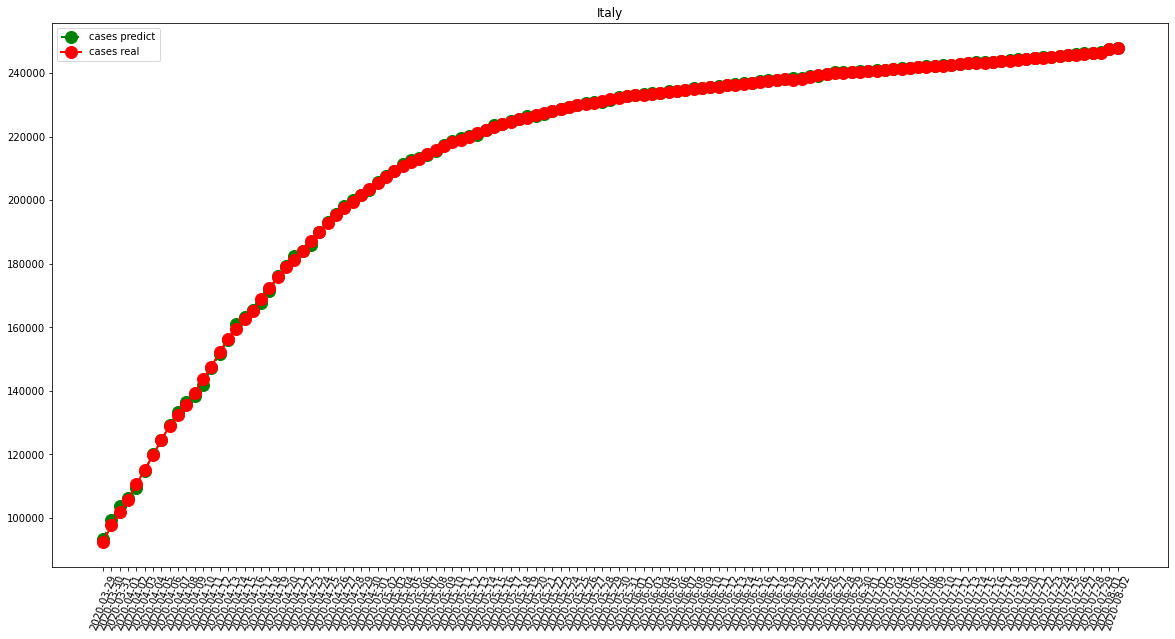

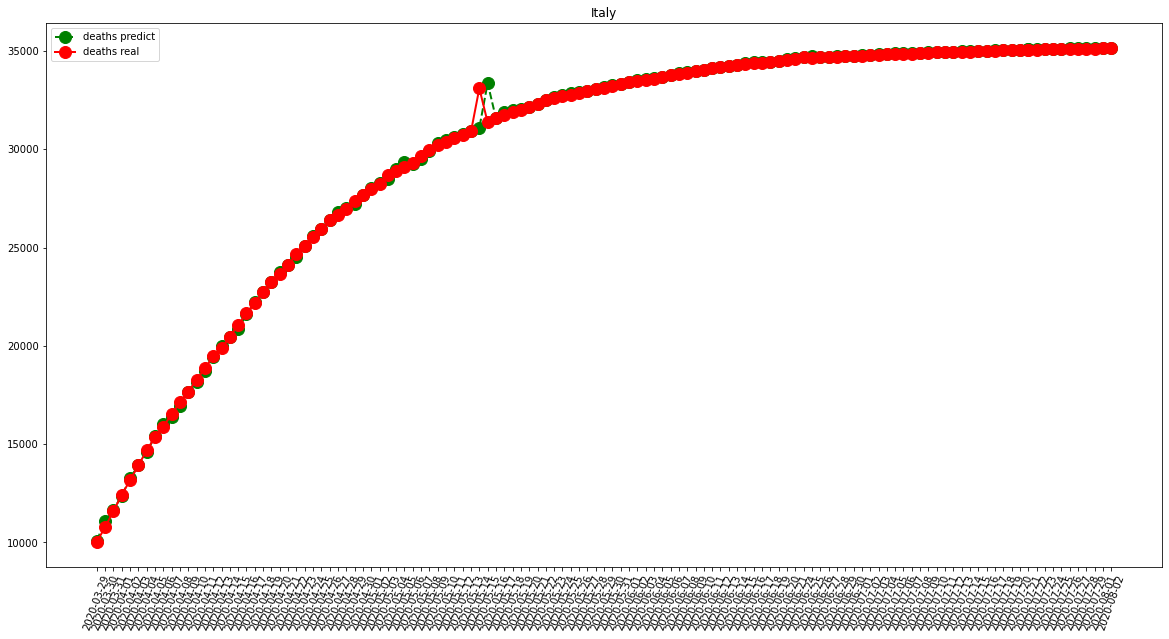

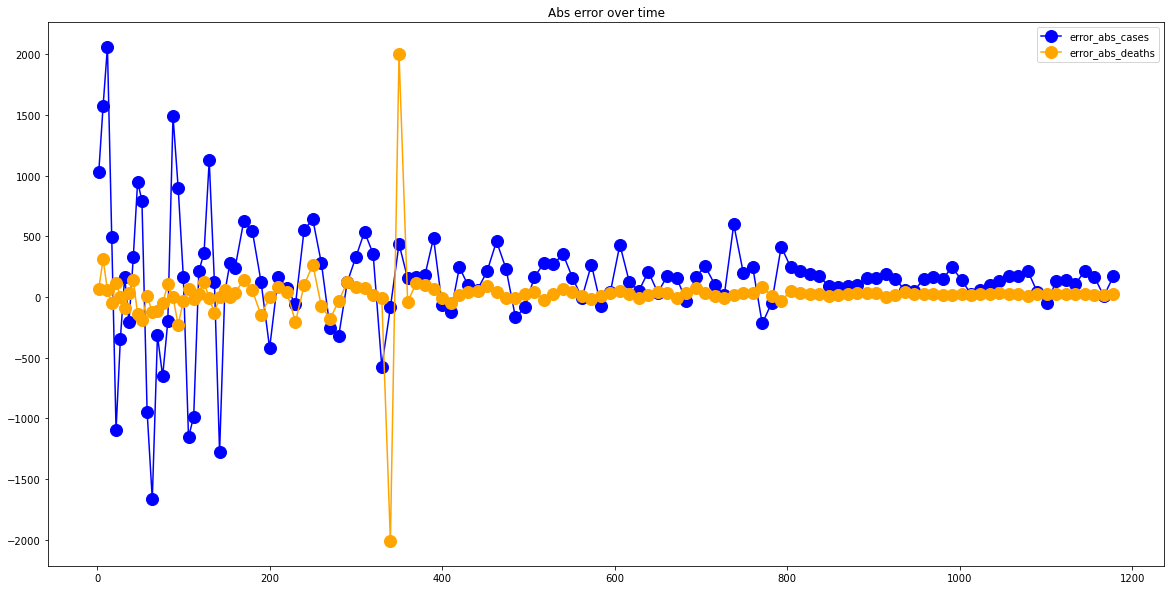

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  1024.0403225806451
RMSE =  2090.195138675319
-- Spain performances for deaths --
MAE =  148.5483870967742
RMSE =  364.53105093636975


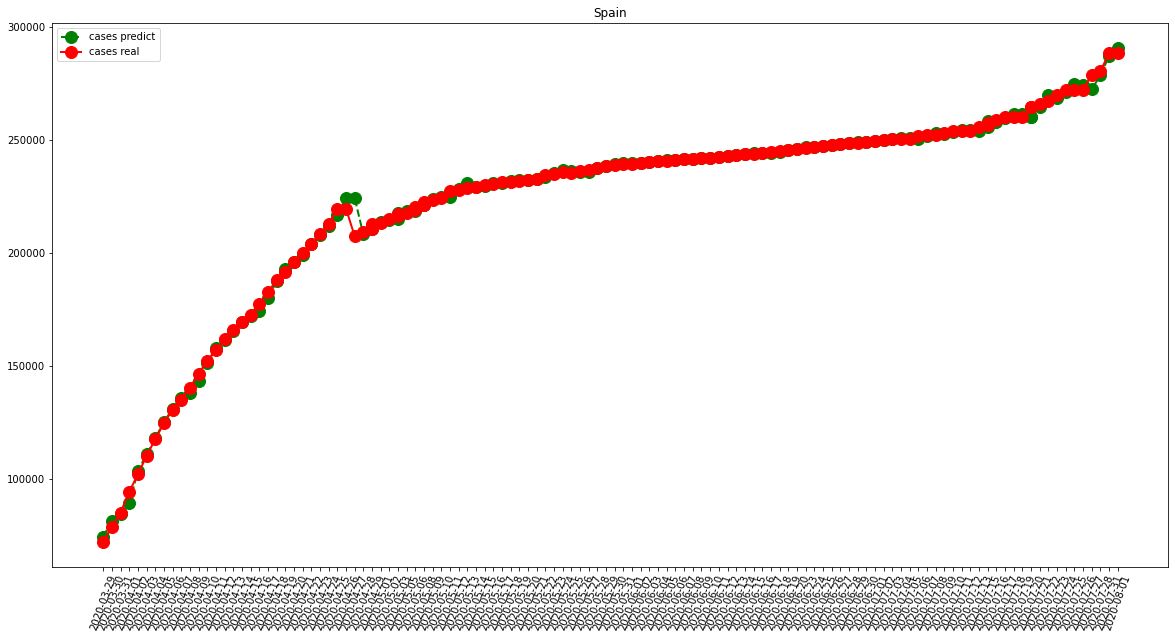

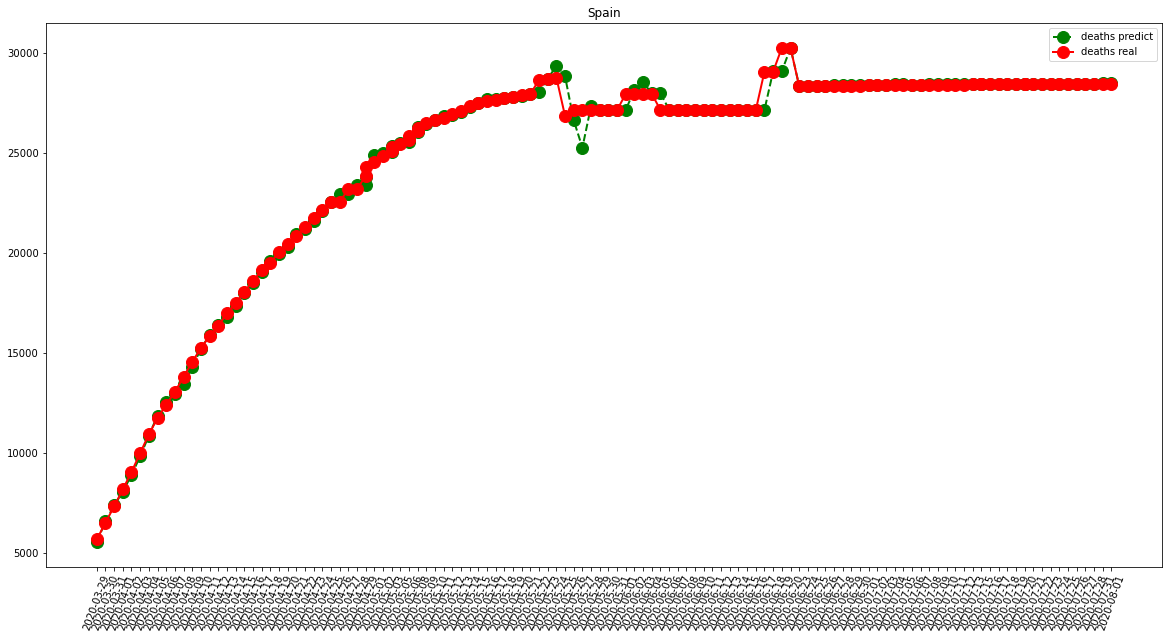

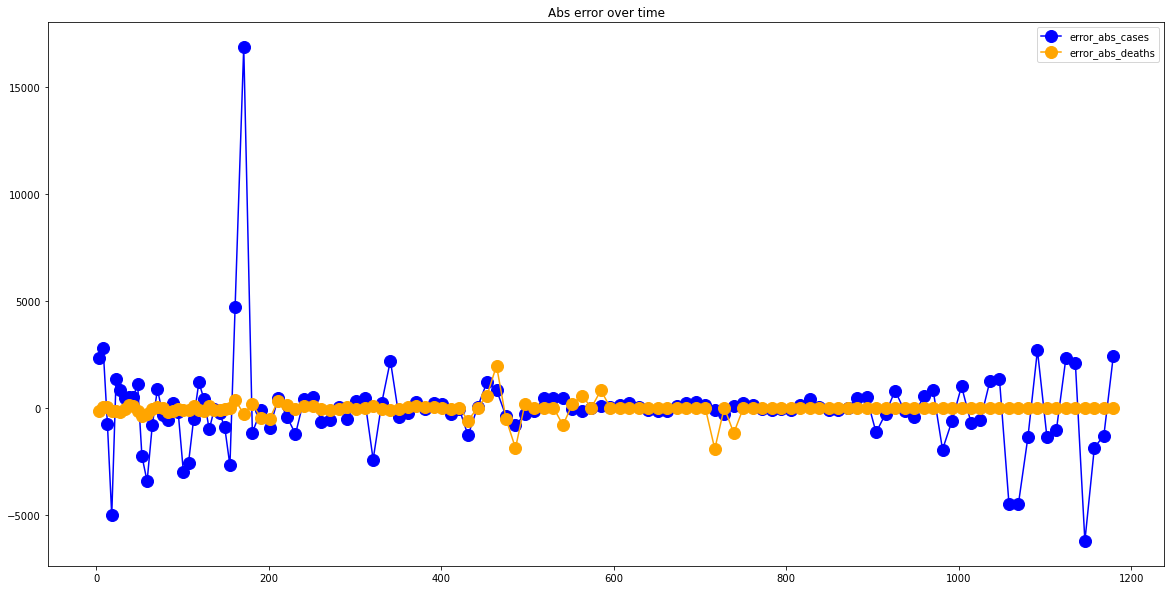

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  5878.322580645161
RMSE =  7861.706831627062
-- United States performances for deaths --
MAE =  497.5
RMSE =  723.6111168211119


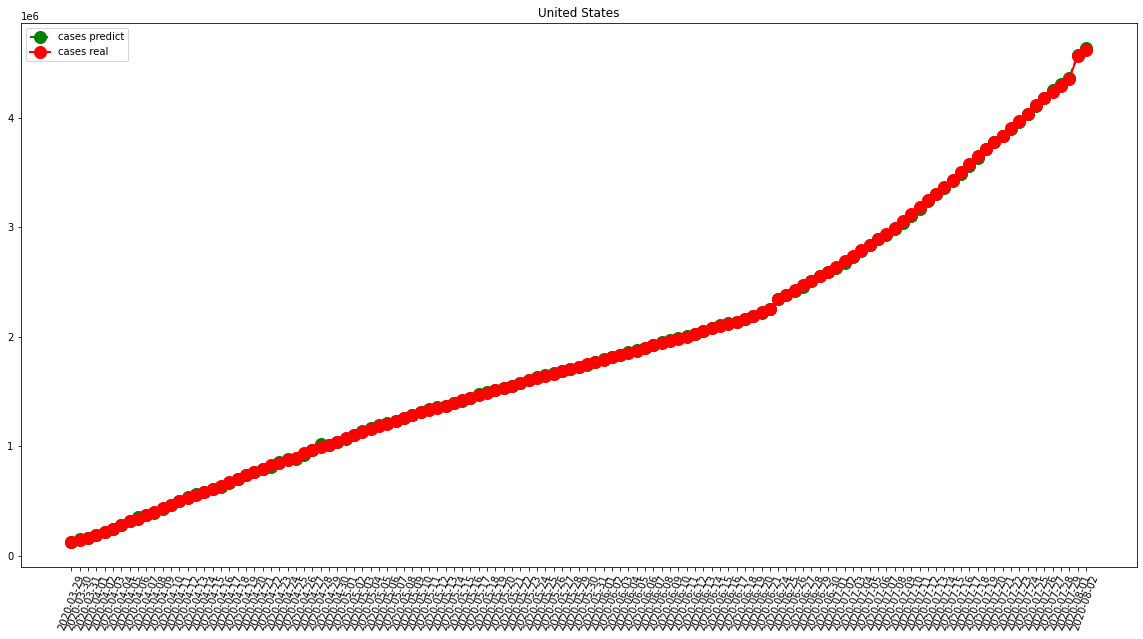

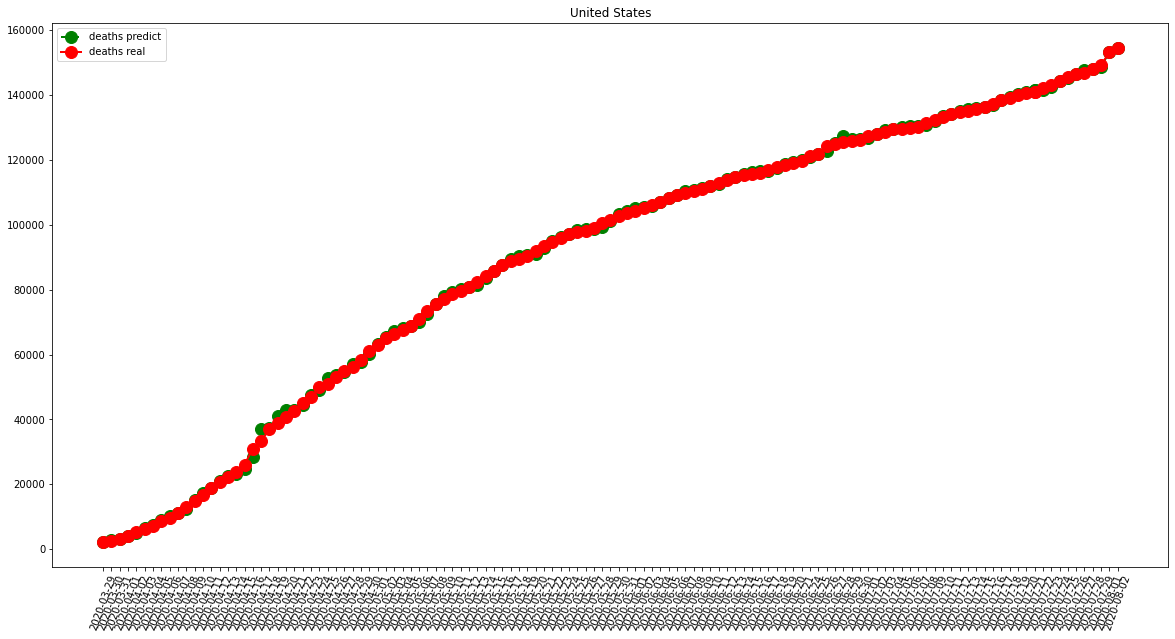

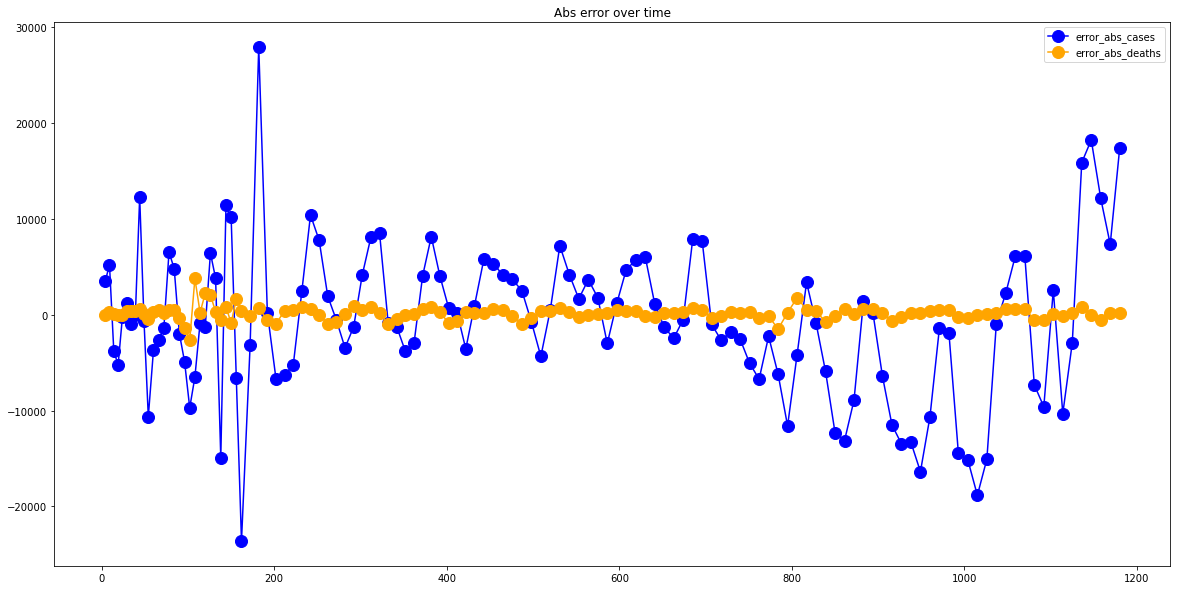

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  77.4758064516129
RMSE =  106.80548342815823
-- China performances for deaths --
MAE =  32.443548387096776
RMSE =  140.9869875029653


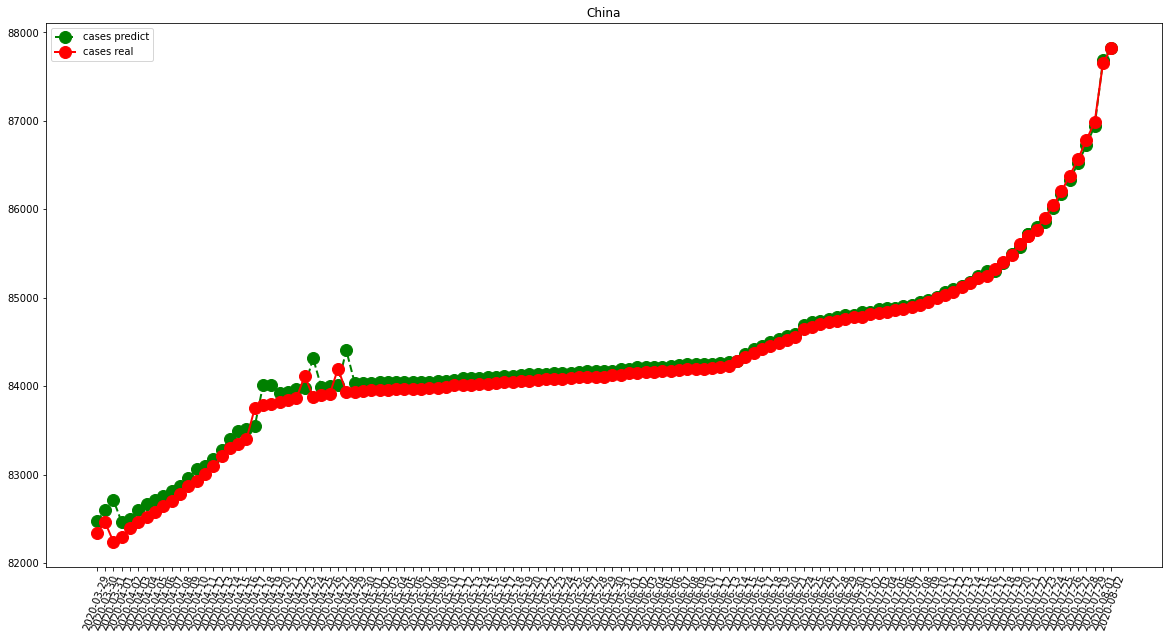

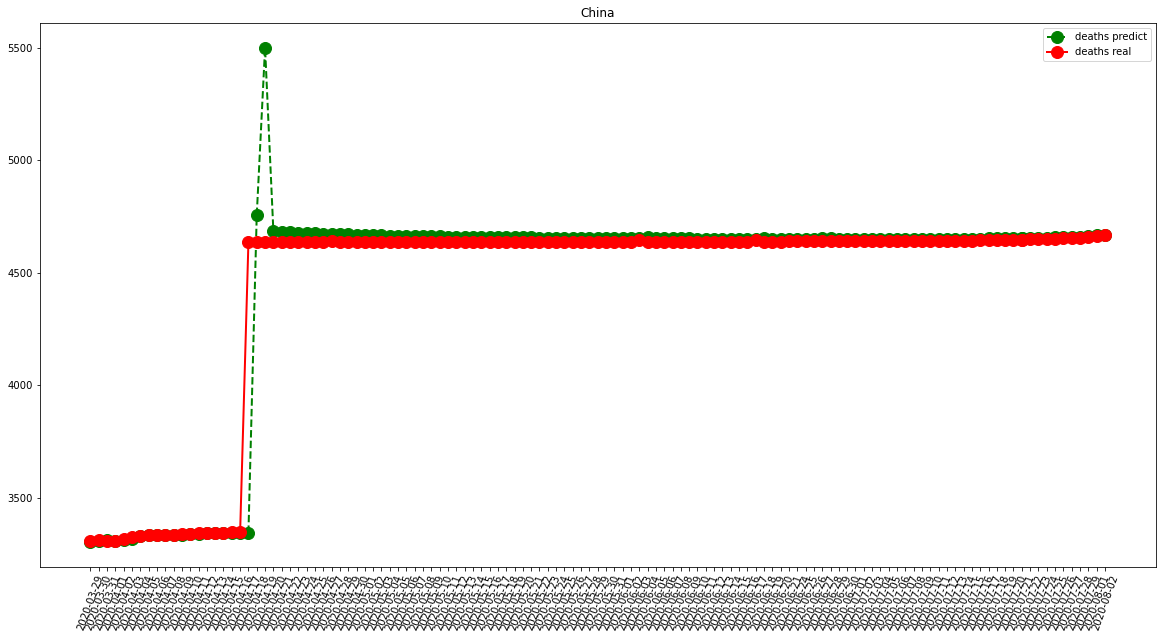

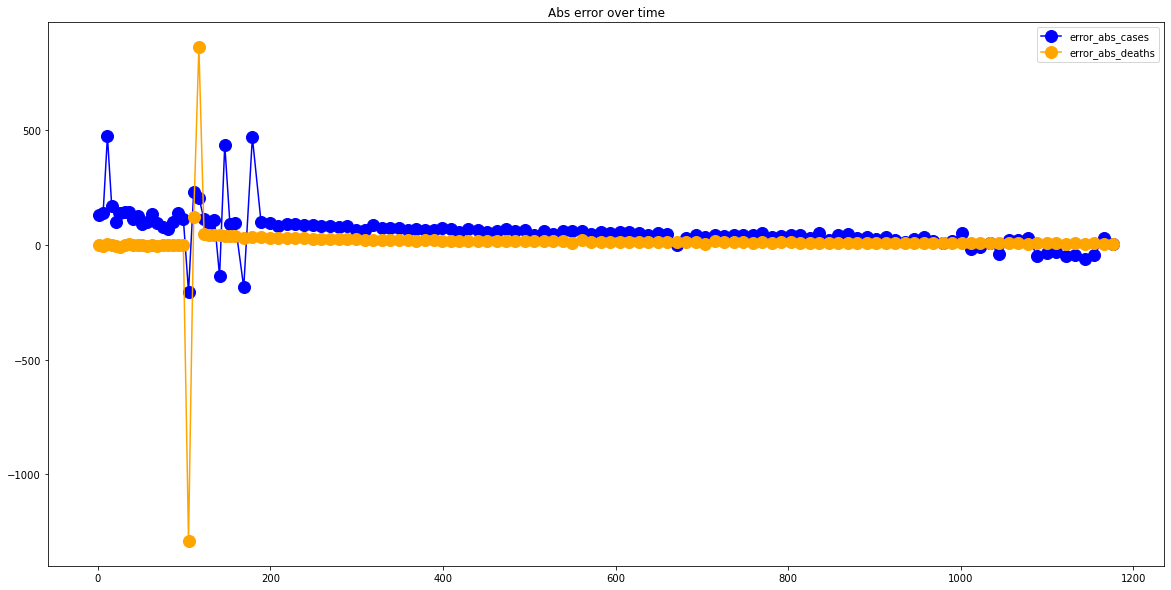

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1278.4166666666667
RMSE =  4259.717403087518
-- United Kingdom performances for deaths --
MAE =  199.46875
RMSE =  500.88784714411537


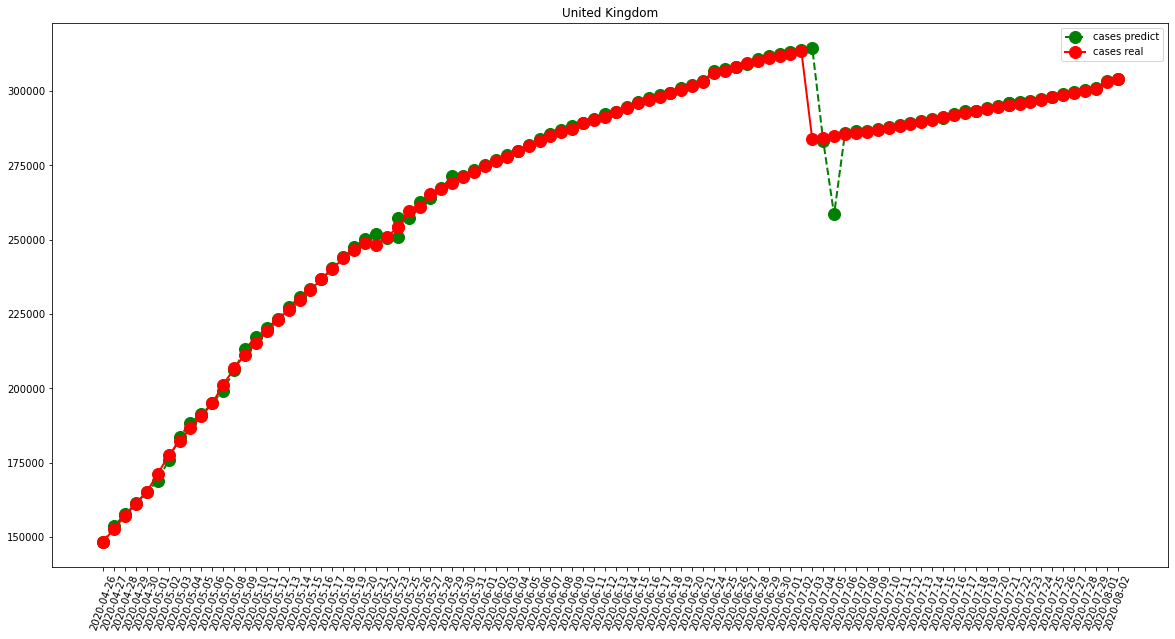

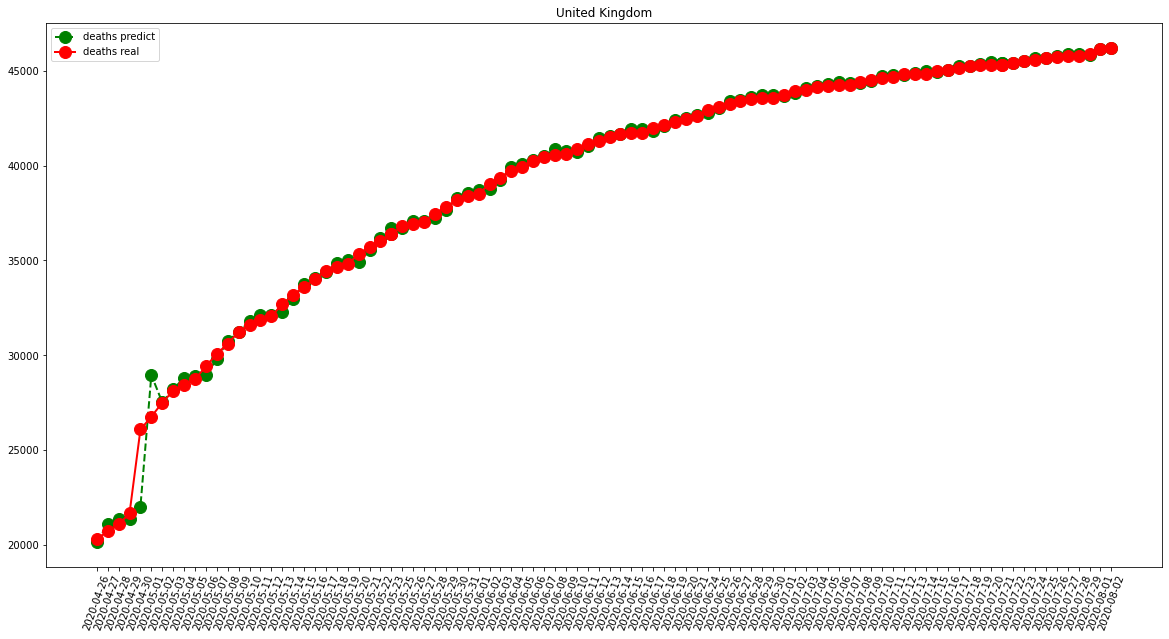

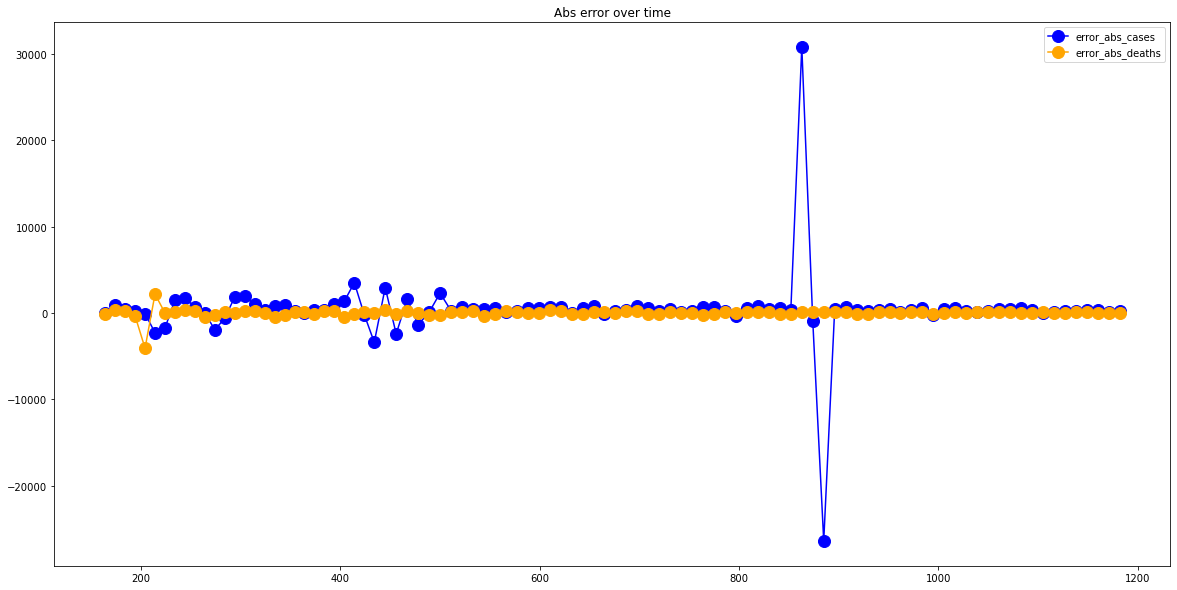

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  311.9479166666667
RMSE =  442.99152315065055
-- Germany performances for deaths --
MAE =  25.458333333333332
RMSE =  44.67032012421671


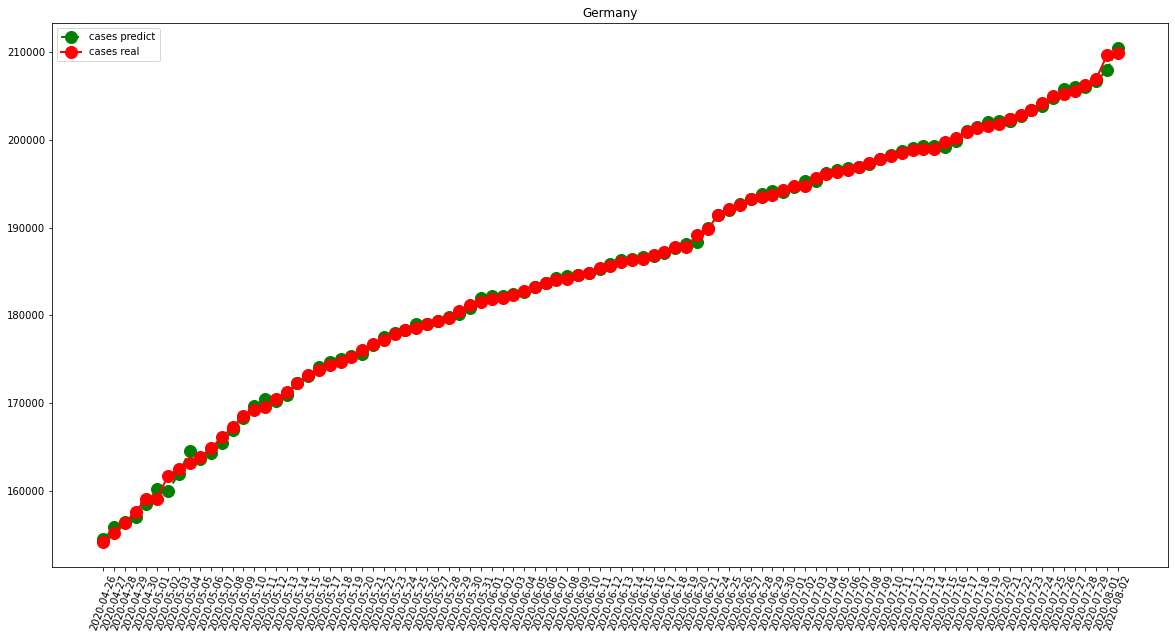

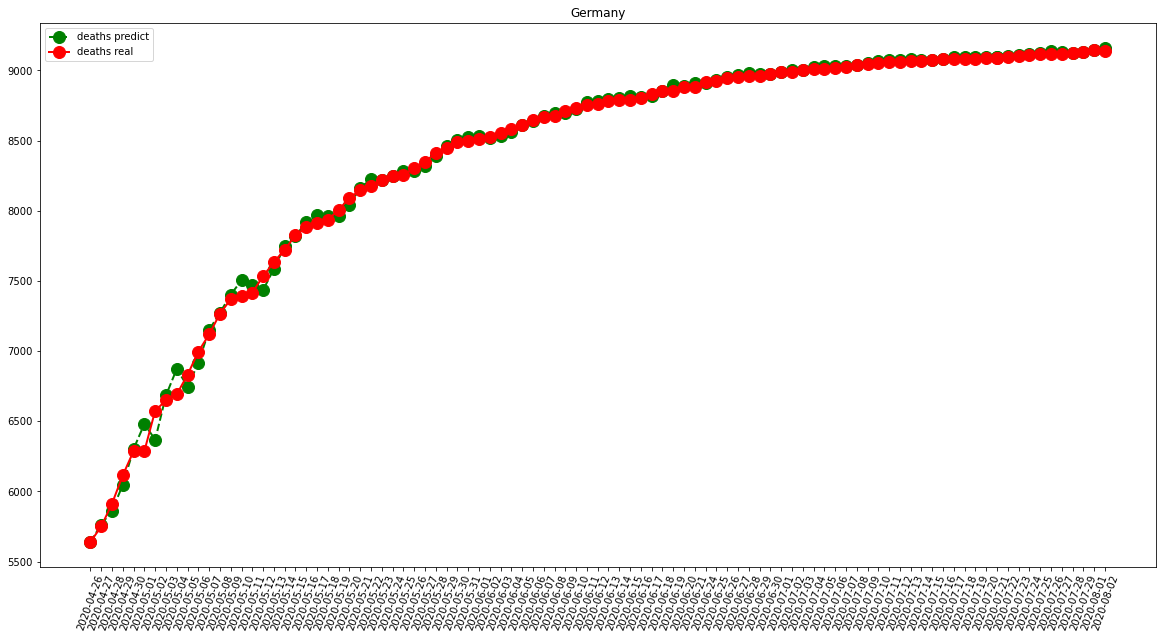

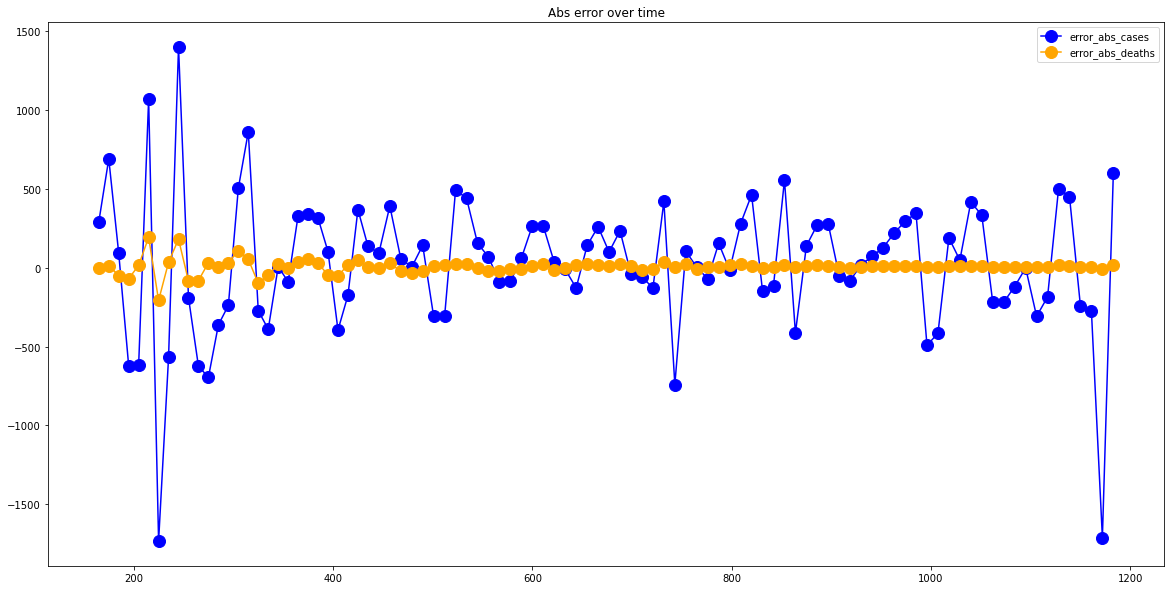

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  553.34375
RMSE =  872.3376102461707
-- Iran performances for deaths --
MAE =  31.125
RMSE =  69.30924060566046


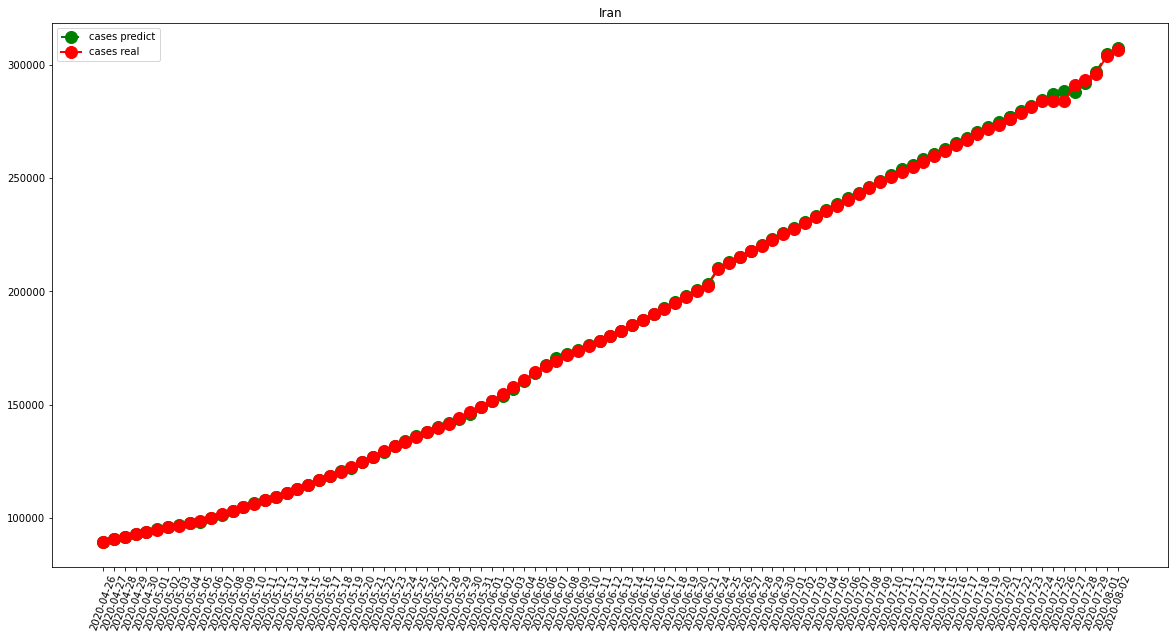

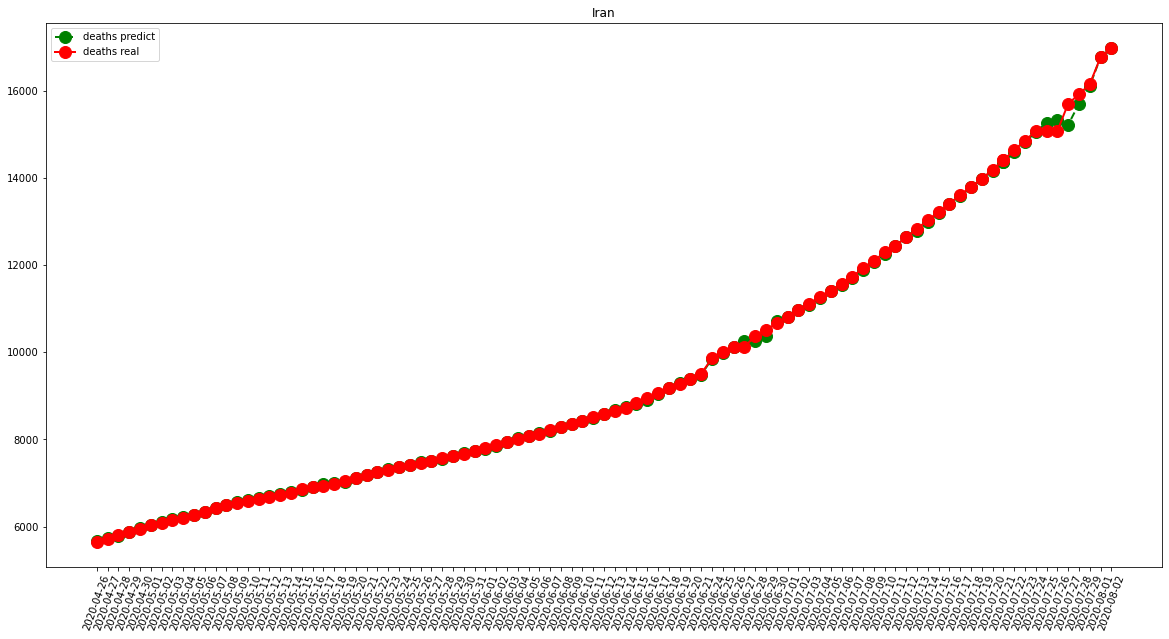

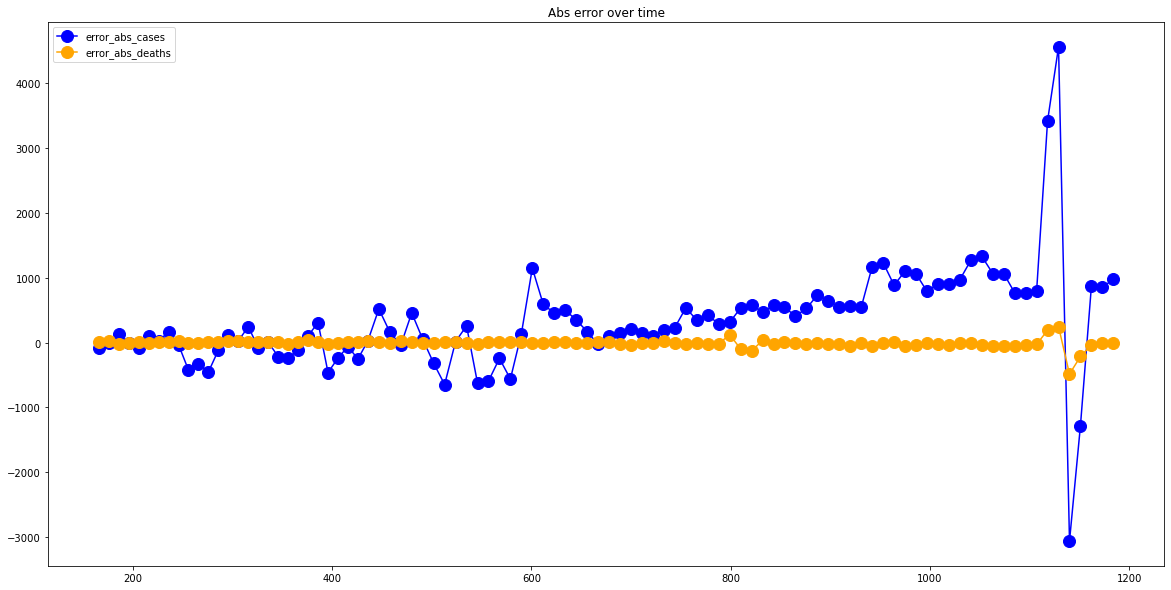

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  203.64583333333334
RMSE =  351.1468413166587
-- Turkey performances for deaths --
MAE =  19.6875
RMSE =  103.60330995355956


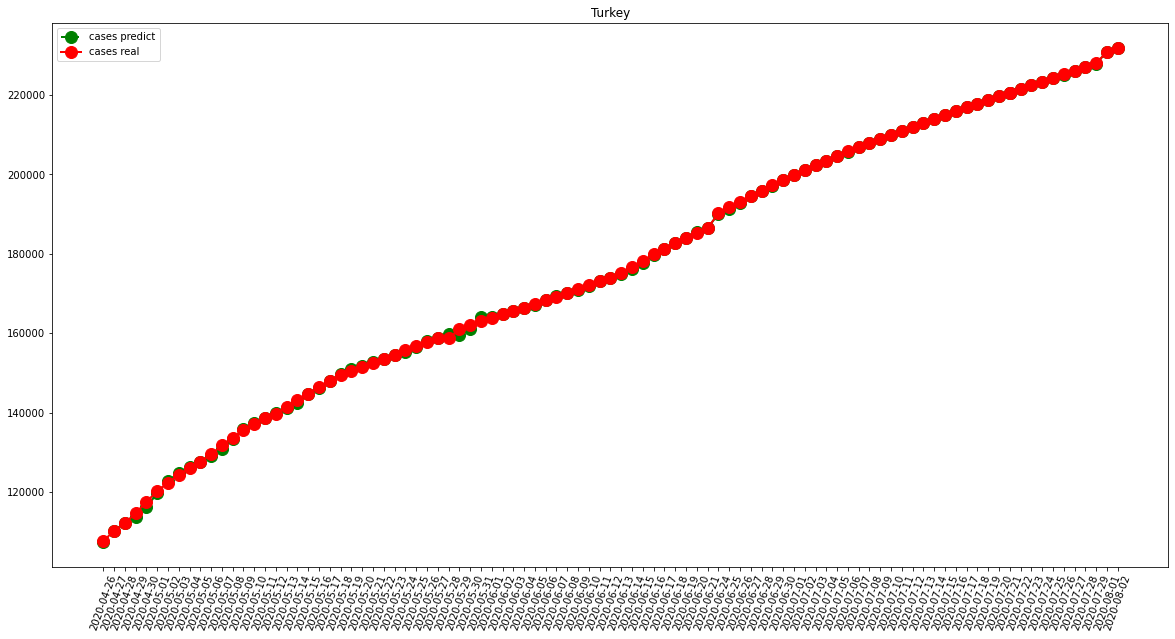

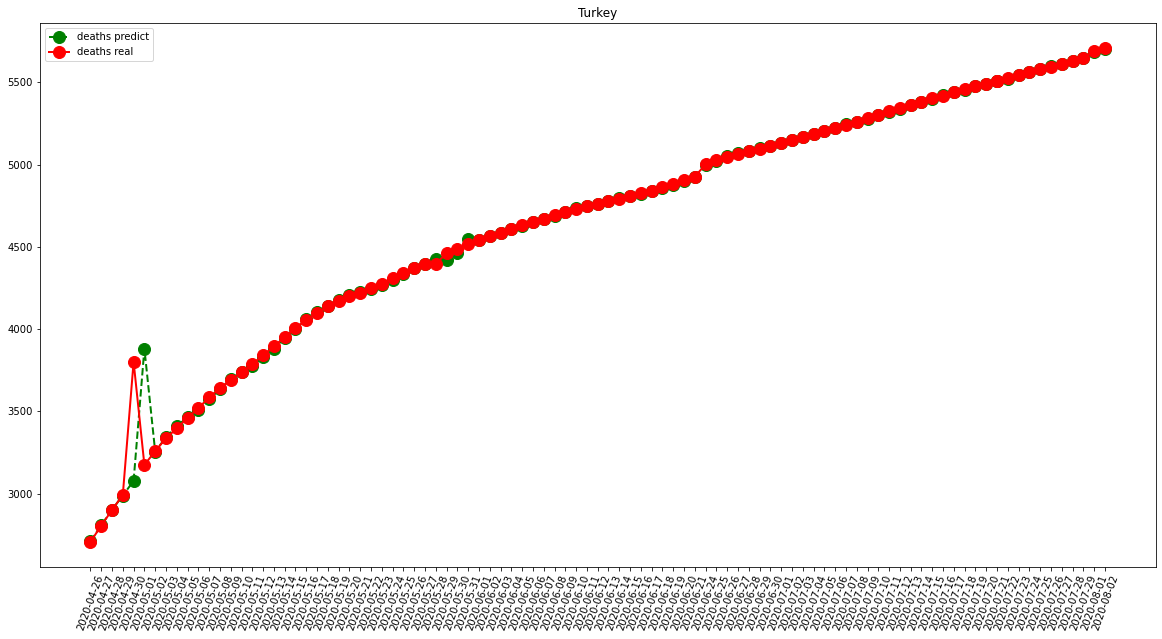

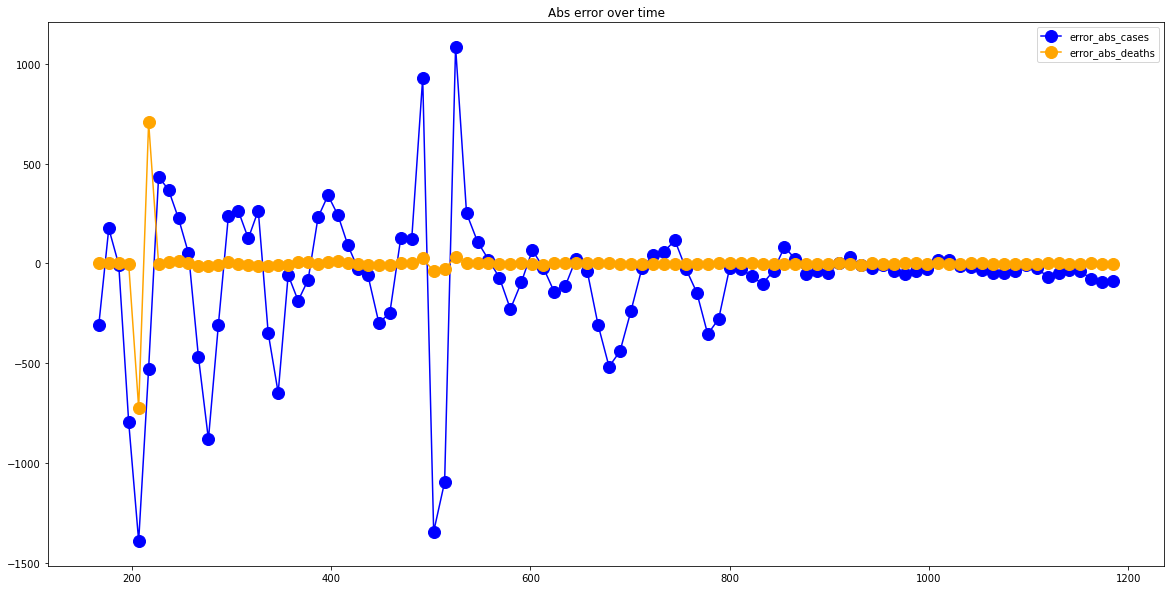

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  11416.565217391304
RMSE =  14950.581549931741
-- Brazil performances for deaths --
MAE =  389.3478260869565
RMSE =  476.7721328545395


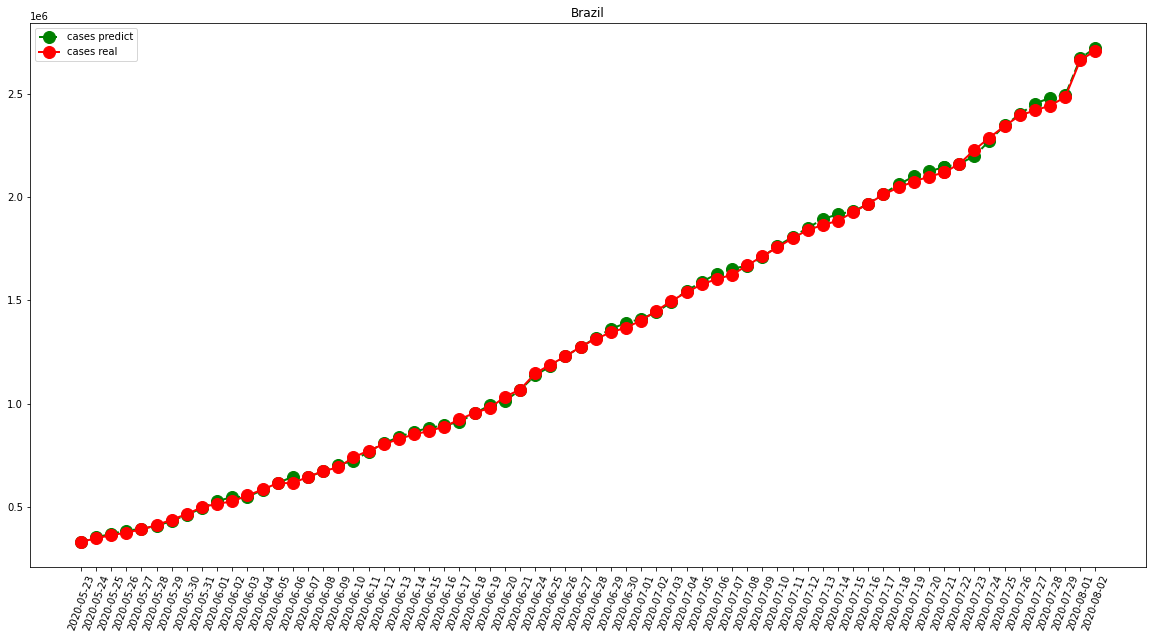

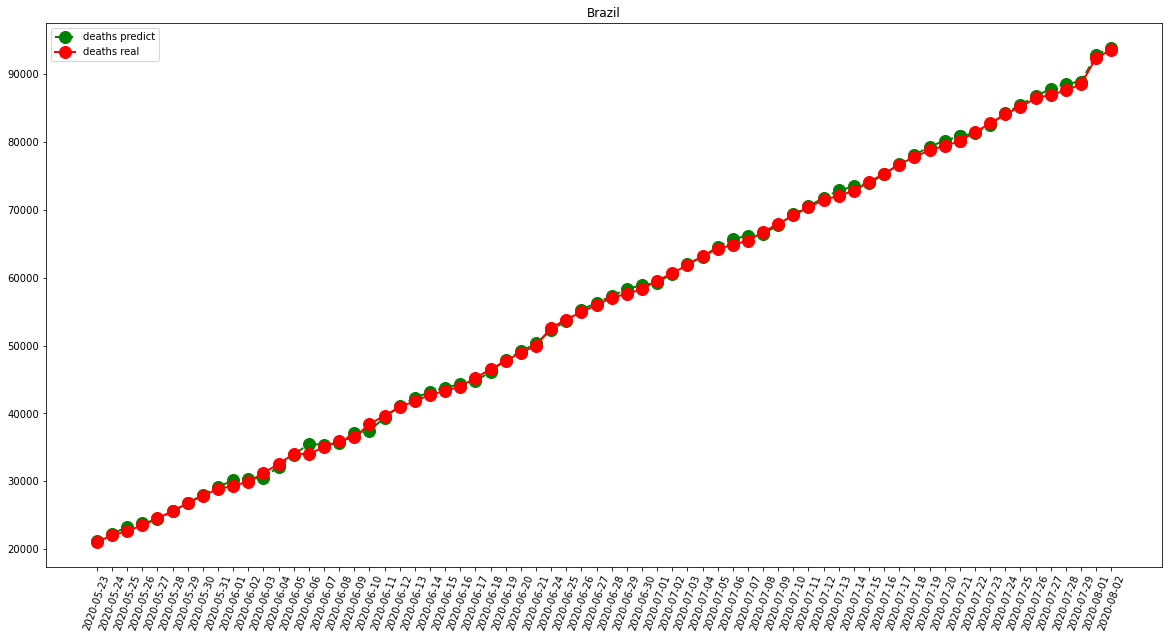

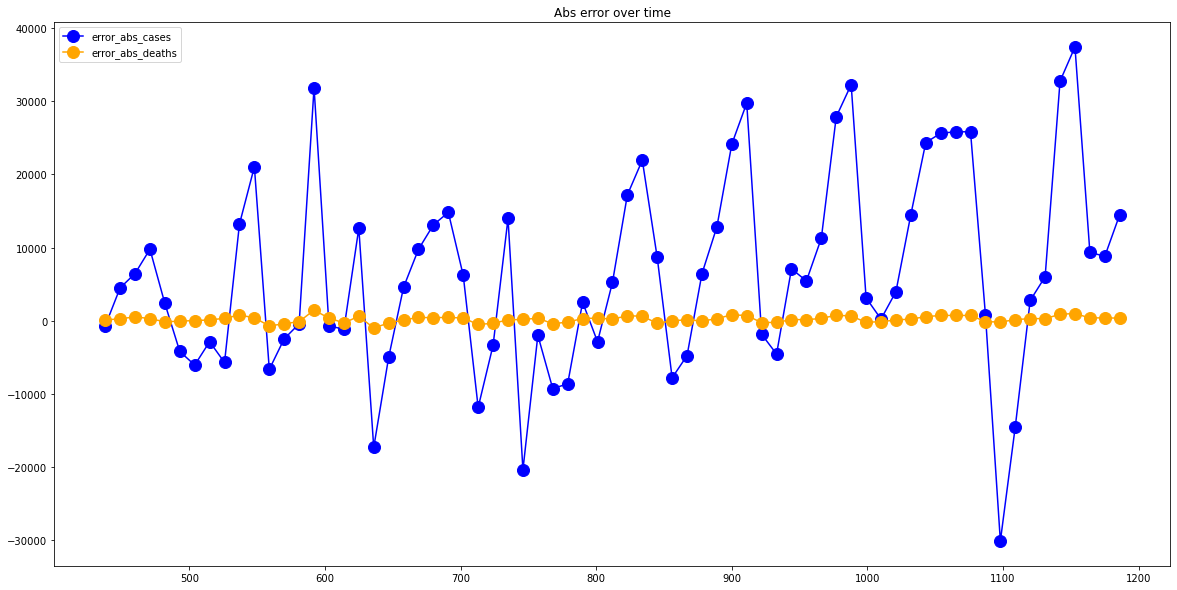

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)